<a href="https://colab.research.google.com/github/spradeepgit/Mobile_Price_Range_Prediction/blob/main/Mobile_Price_Range.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement:**

## **In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**

# **Data Descriptions -**

**Battery_power -** Total energy a battery can store in one time measured in mAh

**Blue -** Has bluetooth or not

**Clock_speed -** speed at which microprocessor executes instructions

**Dual_sim -** Has dual sim support or not

**Fc -** Front Camera mega pixels

**Four_g -** Has 4G or not

**Int_memory -** Internal Memory in Gigabytes

**M_dep -** Mobile Depth in cm

**Mobile_wt -** Weight of mobile phone

**N_cores -** Number of cores of processor

**Pc -** Primary Camera mega pixels

**Px_height -** Pixel Resolution Height

**Px_width -** Pixel Resolution Width

**Ram -** Random Access Memory in Mega Bytes

**Sc_h -** Screen Height of mobile in cm

**Sc_w -** Screen Width of mobile in cm

**Talk_time -** longest time that a single battery charge will last when you are

**Three_g -** Has 3G or not

**Touch_screen -** Has touch screen or not

**Wifi -** Has wifi or not

**Price_range -** This is the target variable with value of

0(low cost),

1(medium cost),

2(high cost) and

3(very high cost).
### **Thus our target variable has 4 categories so basically it is a Multiclass classification problem.**

In [2]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# CSV file loaction path
file_path= '/content/drive/MyDrive/Almabetter/Copy of data_mobile_price_range.csv'

In [5]:
# importing csv file into Pandas dataframe.
mobile_data=pd.read_csv(file_path)

In [6]:
# first 5 rows
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
# last 5 rows
mobile_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [8]:
# lets Check the shape of data
print(mobile_data.shape)
print(f'Total Rows is {mobile_data.shape[0]}\nTotol Columns is {mobile_data.shape[1]} ')

(2000, 21)
Total Rows is 2000
Totol Columns is 21 


In [9]:
# Checking Statistic of the data
mobile_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
# Checking the datatypes, non null values
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### **After Analysing All the columns we saw that there are NO Null values**



#### *  **We don't have any object data type in our data set.**
#### *  **Also we have Zero null values in data set.**
#### *   **Price_range is our target variable.**

In [11]:
# Checking Null values.
mobile_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

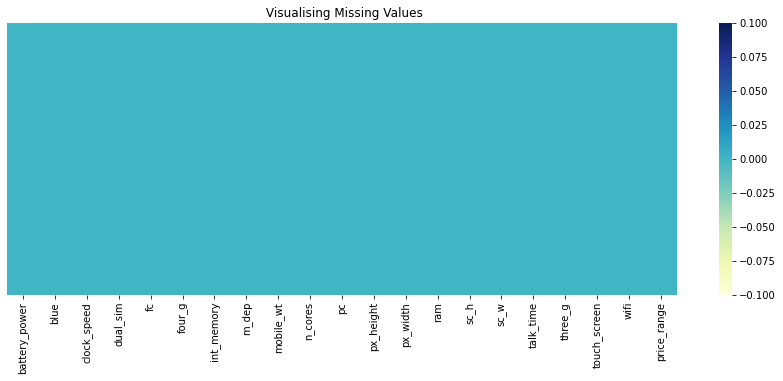

In [12]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(mobile_data.isnull(),cmap='YlGnBu',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

In [13]:
# Checking Duplicate values in data set.
print(f' We have {mobile_data.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.


## **Let's Explore EDA (Exploratory Data Analysis)**

### **Let's have a look at target variable first.!**

In [14]:
# lets have look at our target variable's counts
price_values=mobile_data['price_range'].value_counts()
price_values

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

### **Wow.! its great we have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable.Accuracy score will be the best evalaution metric for us to select the model.**

### **This is the target variable with value of**



*   **0=low cost,**
*   **1=medium cost,**
*   **2=high cost,**
*   **3=very high cost.**



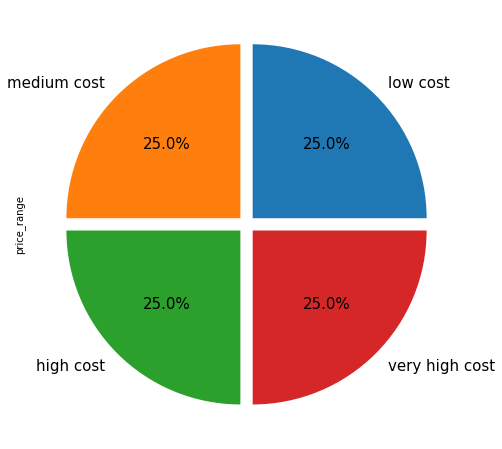

In [15]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15) 


### **We can see that our target varibale is equally distributed.**
### **Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.**

## **Correlation of target variable i.e Dependent variable with the other independent variable.**

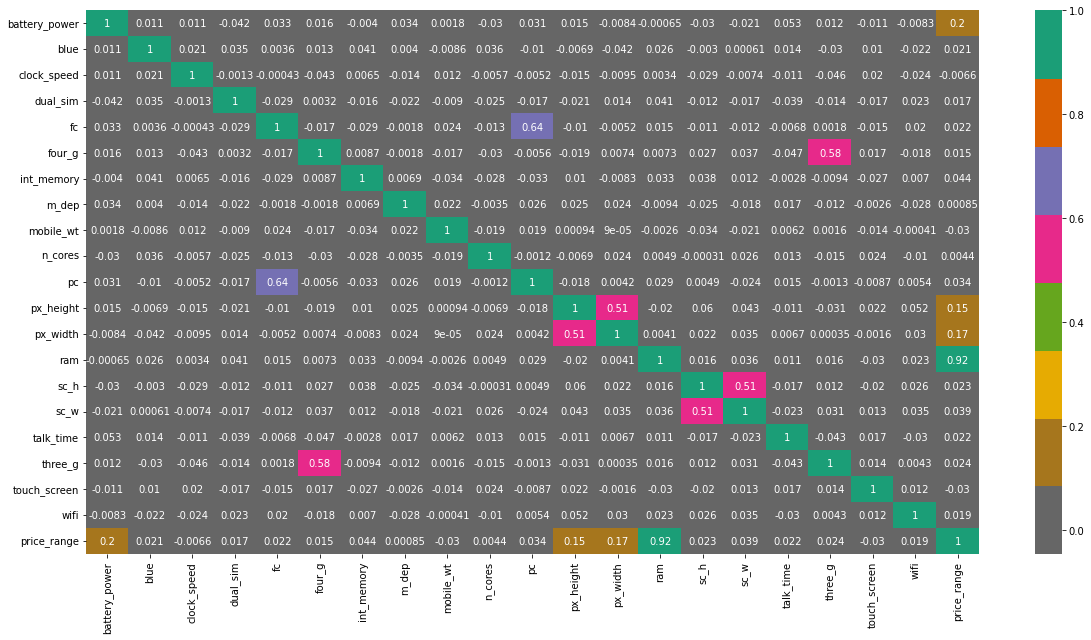

In [16]:
corr= mobile_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap='Dark2_r')

## **Observations till Now:**


*   **RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.**
*   **Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.**
*   **Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.**
*   **Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.**
*   **primary camera i.e pc and front camera fc are positively correlated.**
*   **sc_h and sc_w are positively correlated.**




In [17]:
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

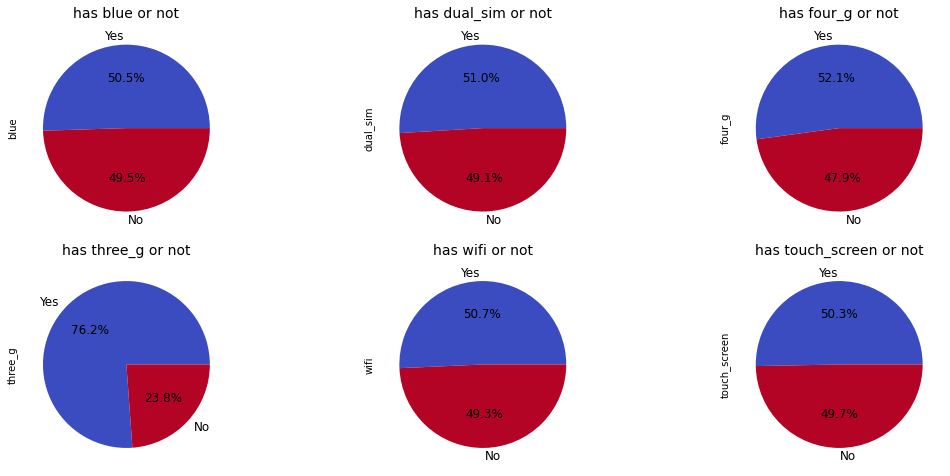

In [18]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  mobile_data[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels, cmap='coolwarm')
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1



### *   **1 means it has the specifications.** 
### *   **0 means it do not have the specifications.**


### *   **Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,    wifi and touchscreen are almost 50 %.** **bold text**
### *   **very few mobiles(23.8%) do not have Three_g.**


### **Relation Between RAM,Battery_power,px_height and px_width**

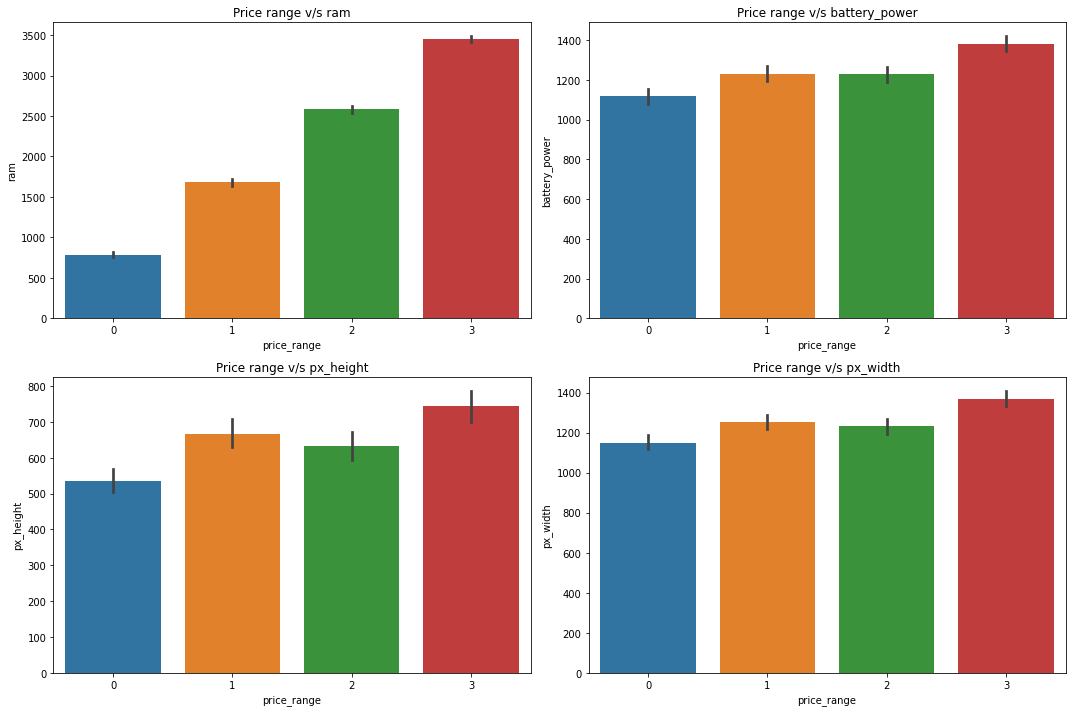

In [19]:
# plotting  price_range vs other fearures
plt.figure(figsize=(15,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=mobile_data['price_range'],y=mobile_data[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()

# **Observations:**



*   **Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.**
*   **Mobiles having RAM less than 1000 MB falls under low cost category.**
*   **Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.**
*   **Mobiles with more than 700 pixel height and width more than 1300 has very high cost.**





In [20]:
# Checking the counts of binary categorical variables by grouping price range.
group_by_price=mobile_data.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()

In [21]:
group_by_price

blue      dual_sim      four_g      three_g      touch_screen  \
               0    1        0    1      0    1       0    1            0   
price_range                                                                 
0            257  243      250  250    241  259     127  373          238   
1            255  245      245  255    238  262     122  378          239   
2            257  243      251  249    253  247     113  387          265   
3            241  259      235  265    225  275     115  385          252   

                 wifi       
               1    0    1  
price_range                 
0            262  252  248  
1            261  248  252  
2            235  248  252  
3            248  238  262

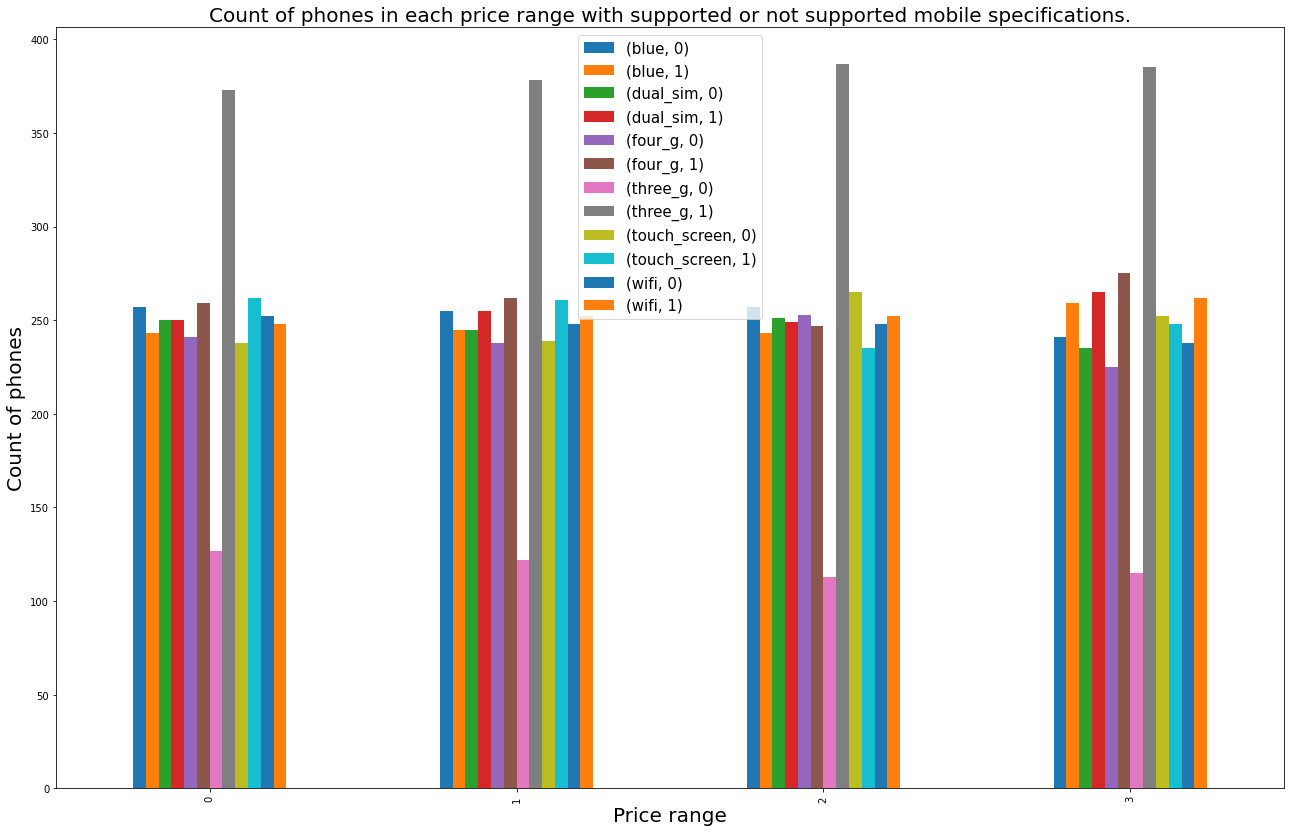

In [22]:
# visualising by plotting barchat.
# plt.figure(figsize=(12,6))
group_by_price.plot.bar(figsize=(22,14))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.',fontsize=20)
plt.xlabel('Price range',fontsize=20)
plt.ylabel('Count of phones',fontsize=20)
plt.legend(loc='upper center',prop={'size': 15})
plt.show()

## **Observations:**

**we saw that in price range the Maximun used of mobile phone is three_g, 1**
**We can see that each price range category has equal number of mobiles phones having both supporting and non supporting specifications.**

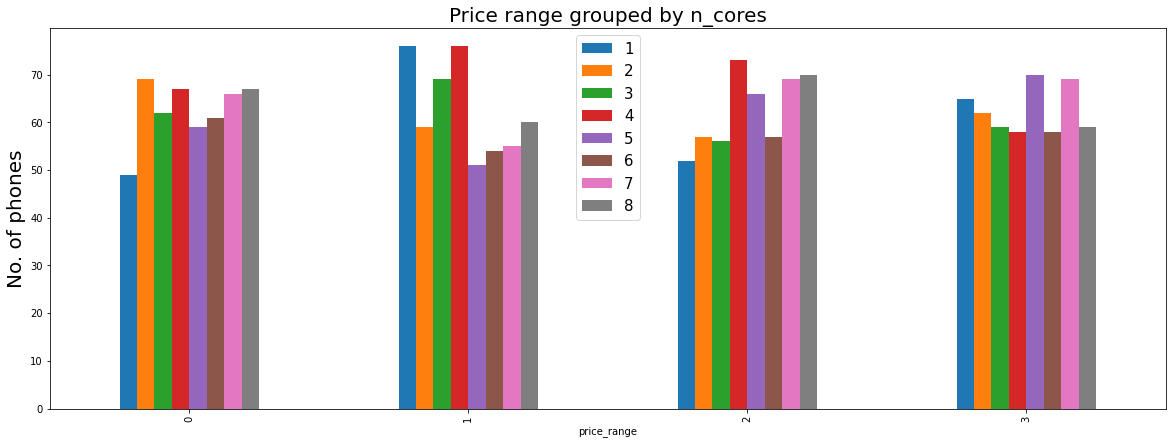

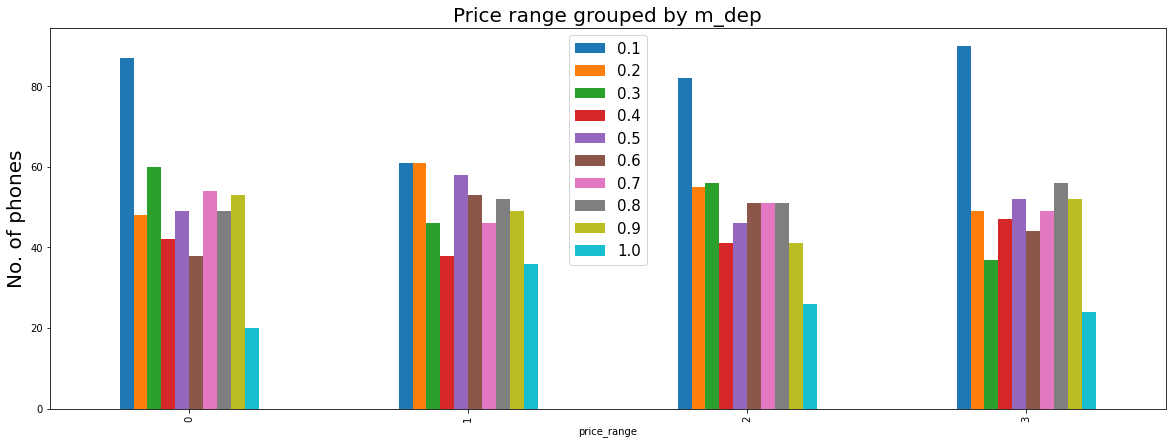

In [23]:
list_2=['n_cores','m_dep']
for item in list_2:
  
  mobile_data.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(20,7))
  plt.title(f'Price range grouped by {item}',size=20)
  plt.legend(loc='upper center',prop={'size': 15})
  plt.ylabel('No. of phones',size=20)

## **Observations:**




*   **There are very few mobiles in price range 0 and 1 with lesser no of cores.**
*   **Most of the mobiles in price range 2 and 3 are with high no of cores.**

*   **Number of phones with less thickness is high and count of phones with high thickness is low.**

## **Mobiles with both 3G and 4G.**

In [24]:
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=mobile_data[(mobile_data['three_g']==1) & (mobile_data['four_g']==1)]

In [25]:
three_g_and_4g_df['price_range'].value_counts()

3    275
1    262
0    259
2    247
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


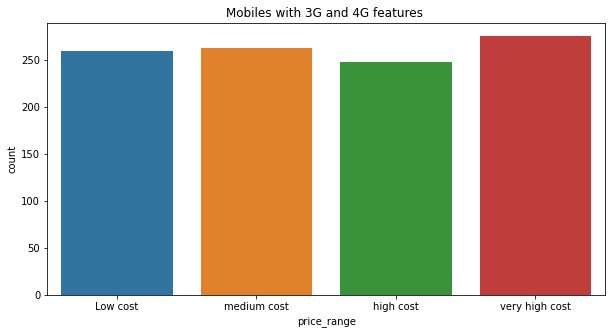

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(three_g_and_4g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

## **mobiles with 3G**

In [27]:
three_g_df=mobile_data[(mobile_data['three_g']==1) & (mobile_data['four_g']!=1)]

In [28]:
three_g_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1829,1,2.1,0,8,0,59,0.1,91,5,...,1457,1919,3142,16,6,5,1,1,1,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


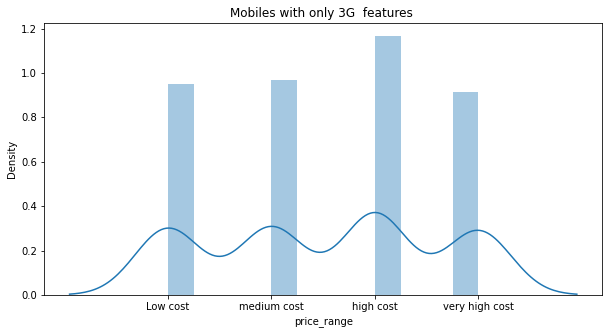

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(three_g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with only 3G  features ")
plt.show()

**the high cost price range of 3g mobile phones are Higher as compared to the others**

## **Mobiles not having no 3G and 4G.**

In [30]:
No_3g_4G_df=mobile_data[(mobile_data['three_g']!=1) & (mobile_data['four_g']!=1)]

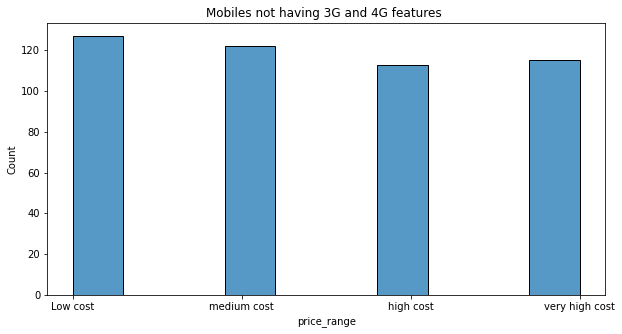

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(No_3g_4G_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

*   **Its very obvious that low cost mobiles will not have 3G and 4G.**
*   **Mobiles with very high cost may have 5G. As we know technologies are changes everytime.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


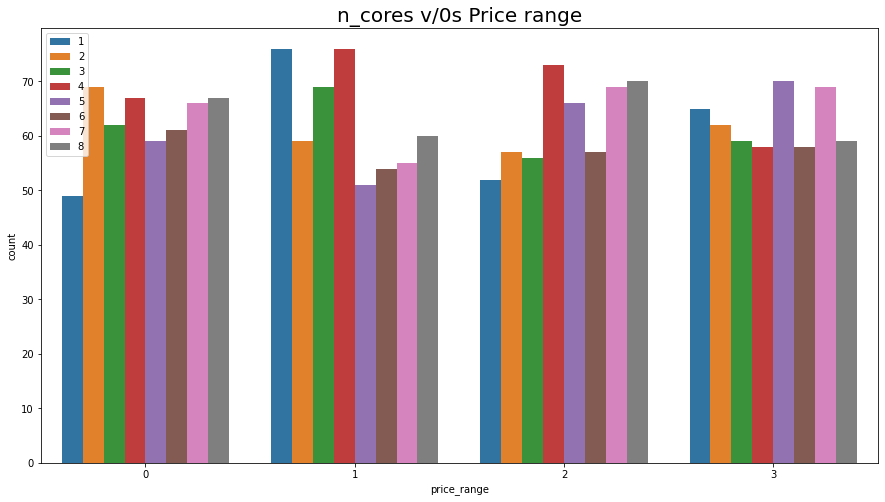

In [32]:
# n_cores v/s price range
plt.figure(figsize=(15,8))
sns.countplot(mobile_data['price_range'],hue=mobile_data['n_cores'])
plt.title("n_cores v/0s Price range",size=20)
plt.legend(loc='best')

## **Observations:**



*   **Price range 0 has majority of phones with 2 core processors**
*  **Price range 1 has majority of phones with 1 and 4 core processors**
*   **Price range 2 has majority of phones with 4 core processors**
*   **Price range 3 has majority of phones with 5 and 7 core processors**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


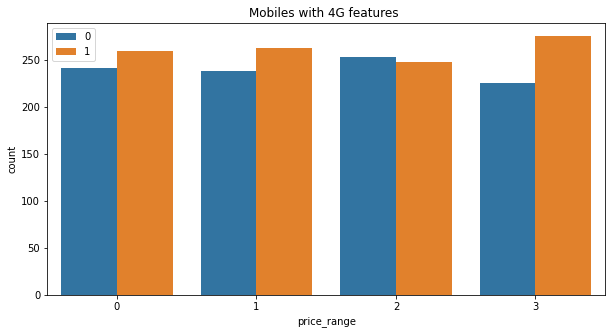

In [33]:
# Miles with 4g services
plt.figure(figsize=(10, 5))
sns.countplot(mobile_data['price_range'],hue=mobile_data['four_g'])
plt.title("Mobiles with 4G features ")
plt.legend(loc='best')
plt.show()

### **Majority of phones of only price range 2 dont have 4G service.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


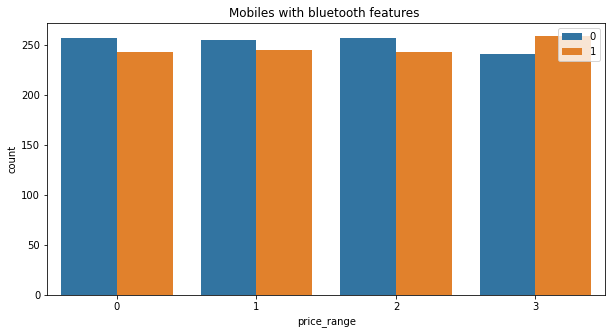

In [34]:
#Check mobiles with bluetooth features
plt.figure(figsize=(10, 5))
sns.countplot(mobile_data['price_range'],hue=mobile_data['blue'])
plt.title("Mobiles with bluetooth features ")
plt.legend(loc='best')

### **Majority of phones of price range from 0 to 2 dont have bluetooth on other hand price range of 3 have bluetooth service.**




## **Let's Check the distribution of numerical columns and Outliers.**

In [35]:
# numeric col list
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


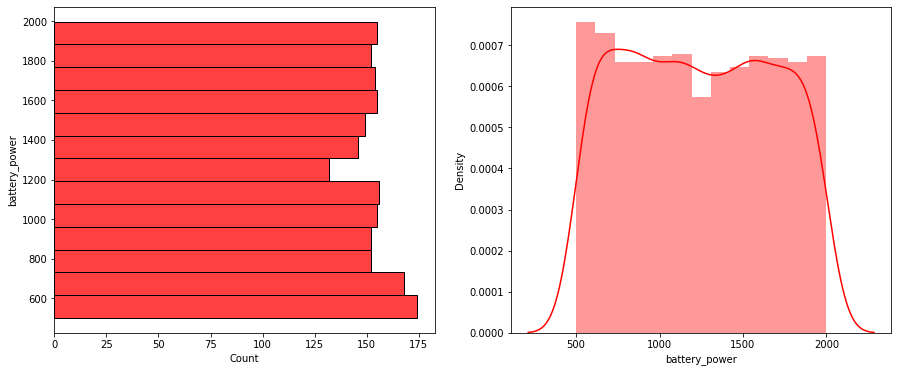

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


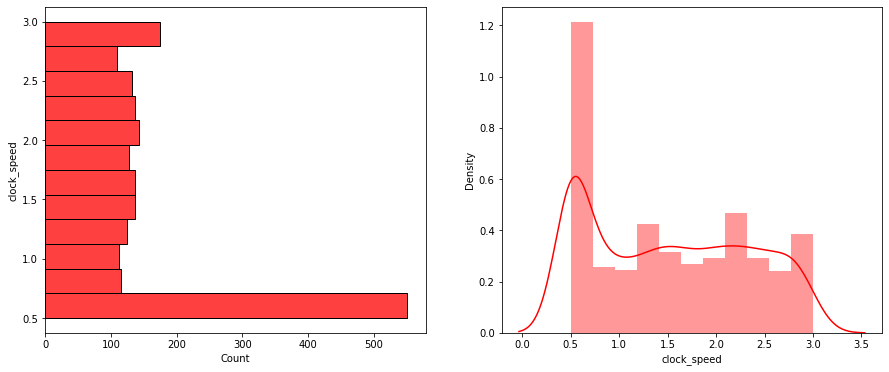

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


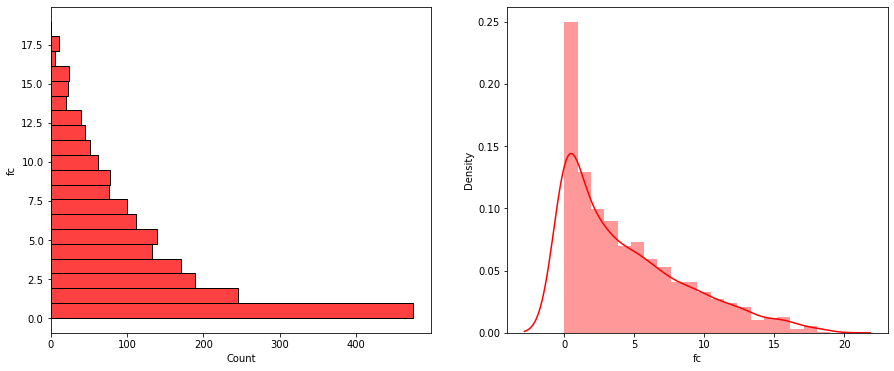

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


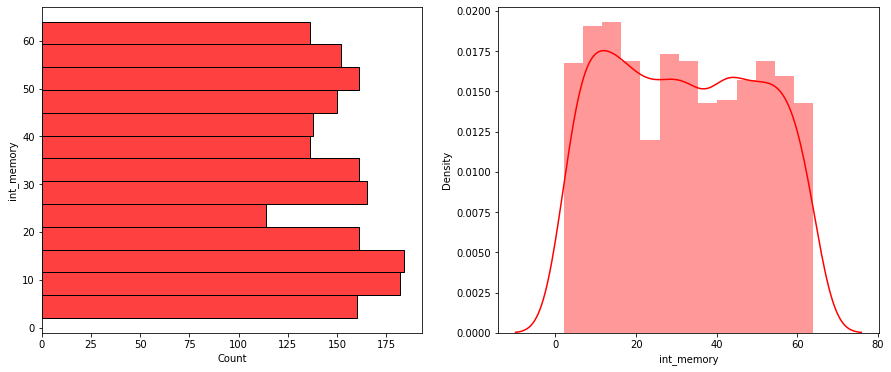

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


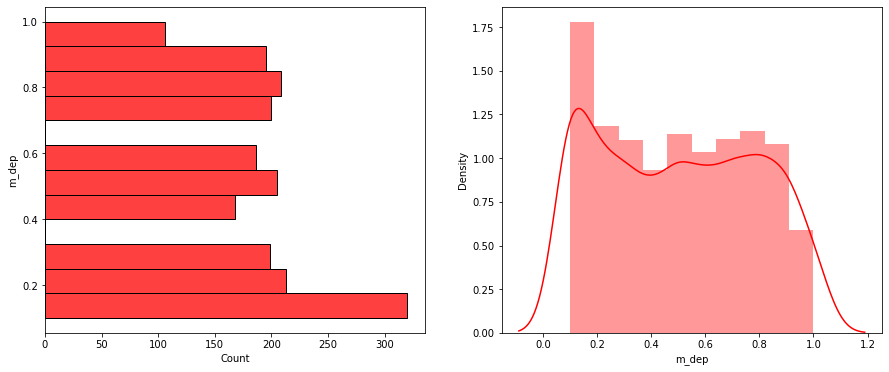

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


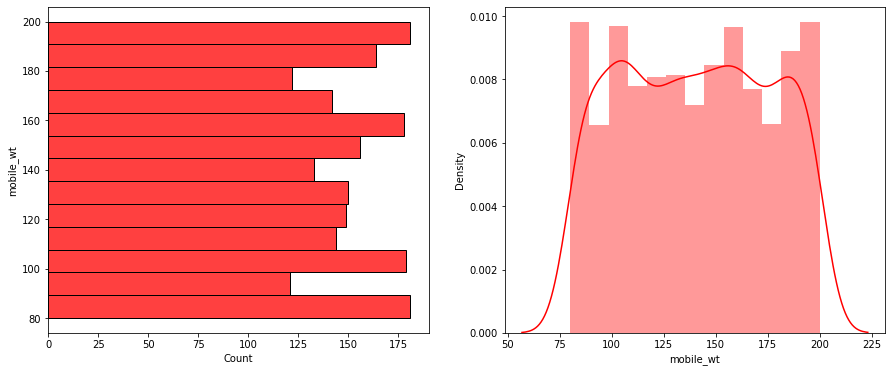

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


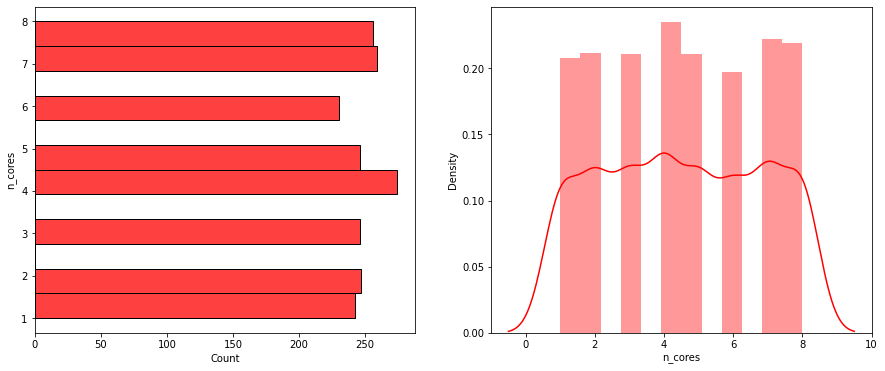

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


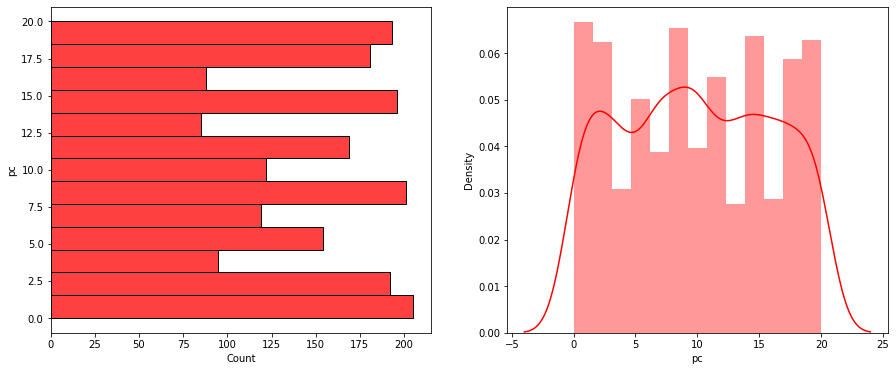

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


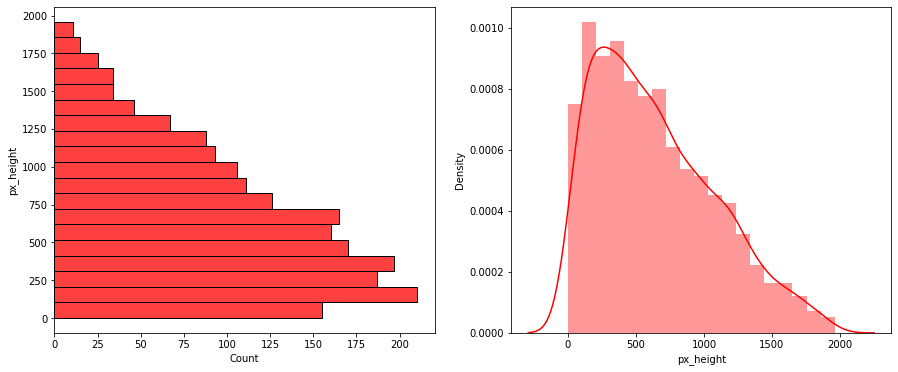

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


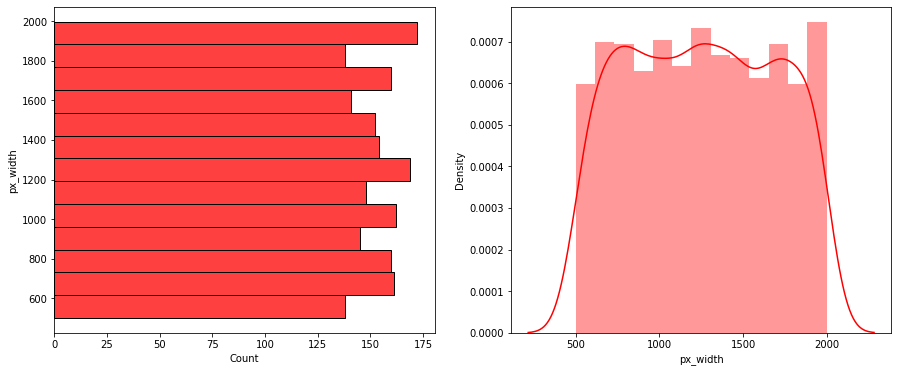

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


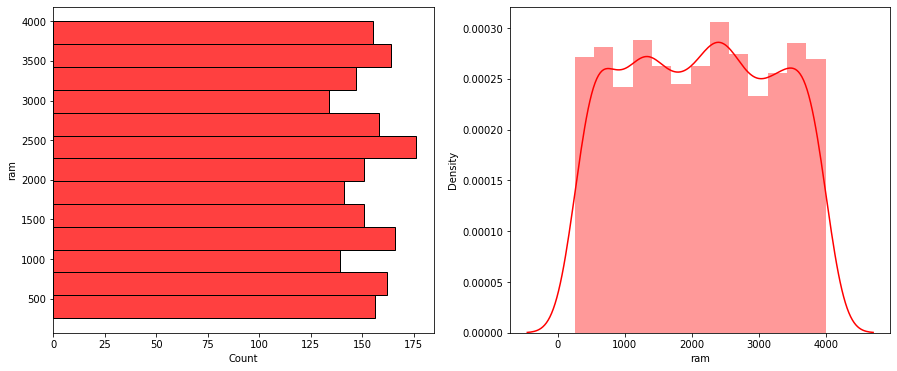

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


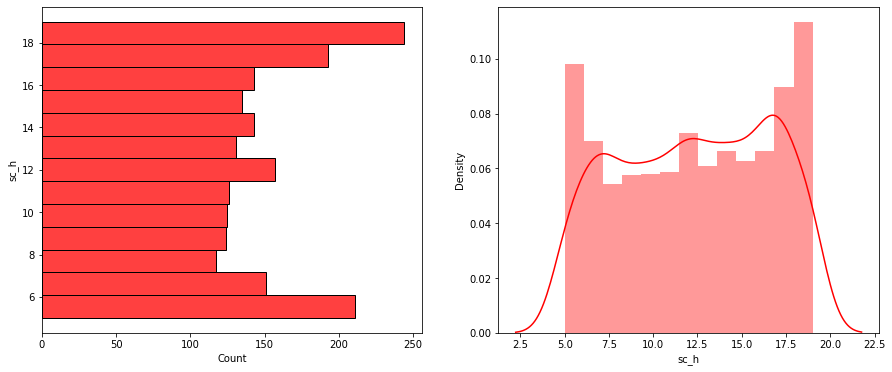

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


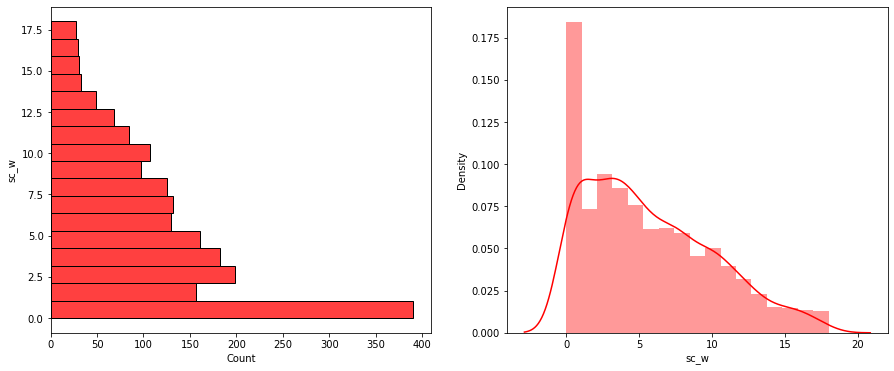

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


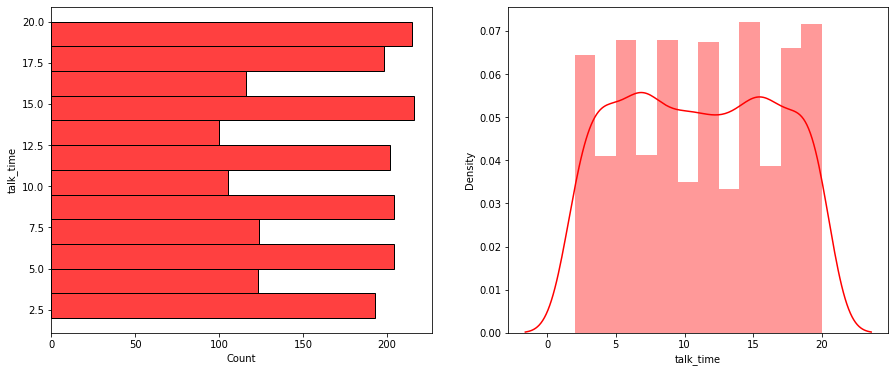

In [36]:
# plotting boXplot and distribution
for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.histplot(y=mobile_data[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(mobile_data[var],color='red')
    
    fig.set_xlabel(var)

    plt.show()



*   **Data is well distrubted.**
*   **fc and px_height has some outliers.**



## **Outlier Treatment.**

In [37]:
#using quartile to make some results on 'fc'
Q1 = mobile_data["fc"].quantile(0.25)
Q3 = mobile_data['fc'].quantile(0.99)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_data = mobile_data[(mobile_data['fc'] <= Q3)]

In [38]:
#using quartile to make some results on 'px_height'
Q1 = mobile_data["px_height"].quantile(0.25)
Q3 = mobile_data['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_data = mobile_data[(mobile_data['px_height'] <= Q3)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


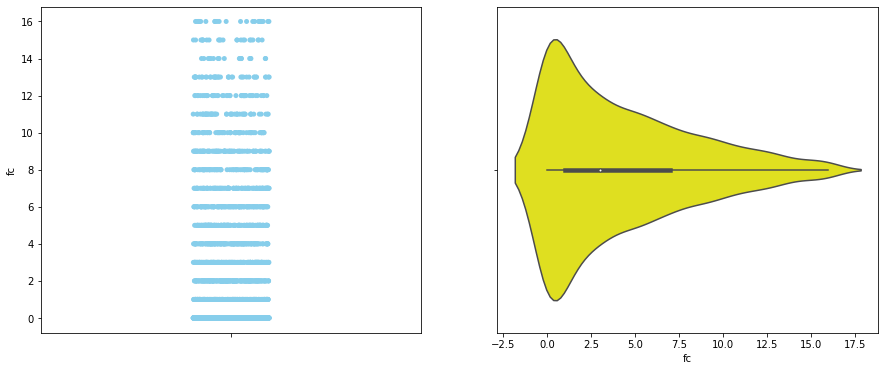

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


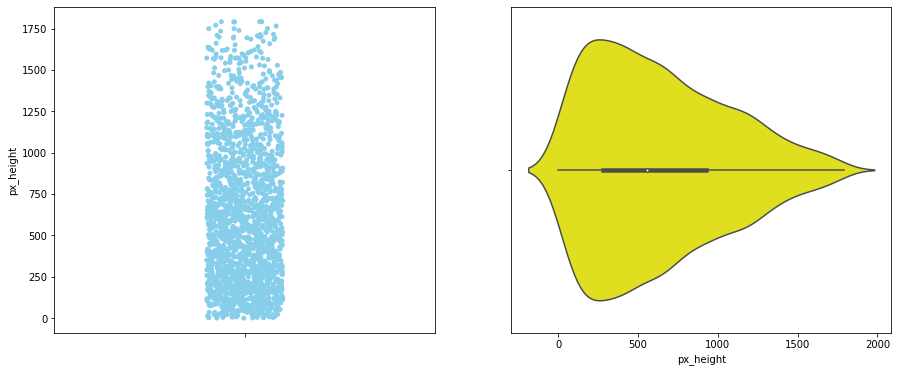

In [39]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.stripplot(y=mobile_data[var],color='skyblue')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.violinplot(mobile_data[var],color='yellow')
    
    fig.set_xlabel(var)

    plt.show()

**So we can saw that there is no outlier present in the plots**

## **Feature Selection**

In [40]:
# create copy of mobile_data
mobile_data_df=mobile_data.copy()

In [41]:
# checking newly created column.
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


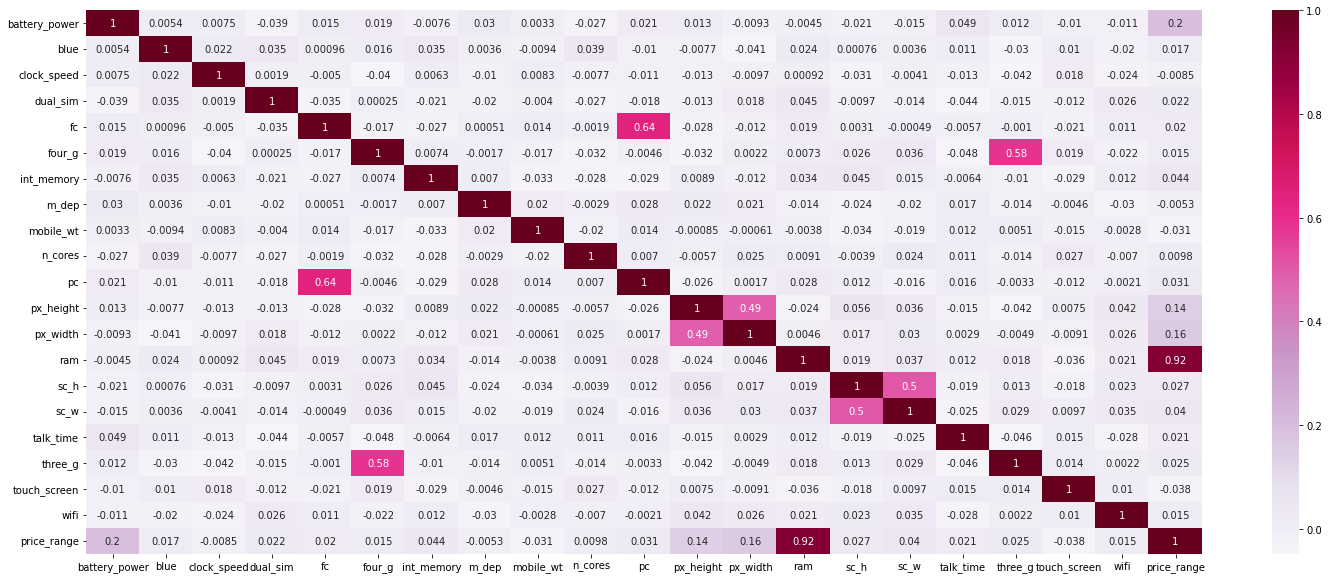

In [42]:
corr= mobile_data.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.PuRd)

## **select the Highly corelated features by chi2 Method and selectKBest**

In [43]:
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X=mobile_data.drop('price_range',axis=1)
y=mobile_data["price_range"]

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [45]:
#No we Will select the  top 12 important features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)

In [46]:
#No we Will select the  top 12 important features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)

In [47]:
# creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [48]:
# conacatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [49]:
# 12 features with highest chi squared statistic 
print(featureScores.nlargest(12,'Score'))

            Specs          Score
13            ram  915771.566479
11      px_height   15390.460943
0   battery_power   13399.493422
12       px_width    9299.682574
8       mobile_wt      89.225442
6      int_memory      79.335880
15           sc_w      18.351715
14           sc_h      11.939828
16      talk_time      11.272551
4              fc      10.807547
9         n_cores       8.051487
10             pc       7.681300


In [50]:
# 12 features with highest chi squared statistic are selected as independent variables.
X=mobile_data[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','fc','n_cores','pc']]

# dependent varaible
y=mobile_data['price_range']

## **Now we can do Predictive Modeling:**
### Algorithms used for predictive modeling:

*   Decision Tree
*   Random Forest Classifier
*   K-Nearest Neighbour Classifier
*   Gradient Boosting Classifier
*   XG Boost Classfier
*   Support Vector Classifier

### **As Decision tree,random forest and enssembles trees do not require Feature scaling as these are Tree based models. So we will be using X_train and X_test which are not scaled.**

### **For K nearest Neighbors and SVM we will be usingseX_train_scaled and X_test_scaled. That is we we will use Standardised data. i.e. Scaled data. As these are distance based Algorithms.**

In [51]:
# importing all essential and required libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [52]:
# splitting the data into Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1473, 12)
(491, 12)
(1473,)
(491,)


In [53]:
# Scaling the data.
# creating an object of MinMax Scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)   

In [54]:
X_train_scaled

array([[-0.91019637, -1.02077573,  0.98689616, ..., -0.5184728 ,
        -1.13655149,  0.52381817],
       [ 0.04710232, -1.28908581, -1.53141326, ...,  0.45720326,
        -0.6941254 ,  0.35706128],
       [-1.50656139,  0.77106893,  0.46121873, ..., -0.27455378,
        -1.13655149, -0.81023702],
       ...,
       [-0.78561013,  0.71040753,  1.69453887, ..., -1.00631082,
         0.1907268 , -0.97699391],
       [ 0.99890455, -1.35441348,  0.86558599, ...,  1.1889603 ,
         0.63315289,  1.02408887],
       [ 0.17993323, -0.20417986,  0.7307969 , ..., -0.27455378,
         0.63315289, -0.64348012]])

In [55]:
X_test_scaled

array([[-0.25703468,  0.05946396, -0.24867046, ...,  1.67679832,
         0.1907268 ,  1.35760267],
       [-0.55201093,  2.31793484,  0.4499863 , ..., -1.00631082,
         0.1907268 , -1.14375081],
       [-1.09890789, -1.16309673,  0.81391684, ..., -0.5184728 ,
         1.51800509, -0.81023702],
       ...,
       [-0.24054533,  0.92038932, -1.20118   , ..., -1.00631082,
        -1.13655149, -1.64402151],
       [-0.6830097 , -0.10852148,  1.23850246, ...,  1.67679832,
         0.1907268 ,  0.52381817],
       [ 1.65847877, -0.55881578, -1.58982187, ..., -1.00631082,
         0.1907268 , -1.47726461]])

In [56]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4
   
  for i in range(n_class):
     fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='solid',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='dotted',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='dashdot',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='dashed',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve',size=20)
  plt.xlabel('False Positive Rate',size=20)
  plt.ylabel('True Positive rate', size=20)
  plt.legend(loc='best',prop={'size': 15})
  plt.savefig('Multiclass ROC',dpi=300);
  plt.show()

In [57]:
# creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

## **1) Decision Tree Classifier:**

### **Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data. So here we will use X_train,X_test,y_test and Y_train which are not scaled.**

**Decision Tree with default hyperparameters:**

In [58]:
# Creating object of the decision tree.
dtc=DecisionTreeClassifier(random_state=0)

In [59]:
# fitting/training the train set.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [60]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [61]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [62]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.8126272912423625

In [63]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[105,  16,   0,   0],
       [  7,  98,  14,   0],
       [  0,  23,  88,  20],
       [  0,   0,  12, 108]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


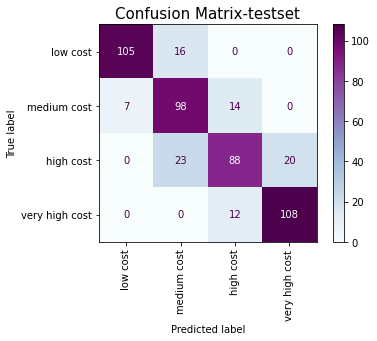

In [64]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc,X_test,y_test,cmap='BuPu',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [65]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00       373
           2       1.00      1.00      1.00       360
           3       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [66]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       121
           1       0.72      0.82      0.77       119
           2       0.77      0.67      0.72       131
           3       0.84      0.90      0.87       120

    accuracy                           0.81       491
   macro avg       0.82      0.82      0.81       491
weighted avg       0.82      0.81      0.81       491





*   **Train set accuracy is 100% and test accuracy is 84%.**
*   **Model is overfitted on train set and did not generalised well.**
*   **We will tune hyperparamters to reduce overfitting and try to imporve the model performance.**




### **Let's tune some hypereparameters of Decsion Tree classifier:**

In [67]:
# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)

In [68]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [69]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train) 

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.308 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.298 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.332 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.299 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.313 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.281 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.342 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [70]:
# getting best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': None,
 'min_samples_split': 10,
 'splitter': 'random'}

In [71]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       random_state=0, splitter='random')

In [72]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [73]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [74]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9769178547182621

In [75]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.8329938900203666

In [76]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[109,  12,   0,   0],
       [ 14,  94,  11,   0],
       [  0,  17, 101,  13],
       [  0,   0,  15, 105]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


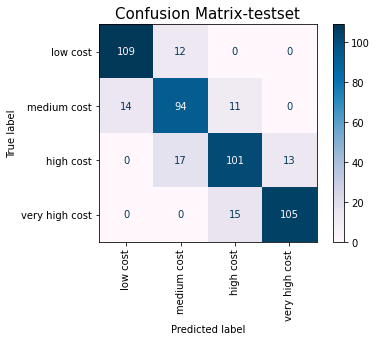

In [77]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc_optimal,X_test,y_test,cmap='PuBu',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [78]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       373
           1       0.97      0.97      0.97       373
           2       0.98      0.96      0.97       360
           3       0.99      0.98      0.98       367

    accuracy                           0.98      1473
   macro avg       0.98      0.98      0.98      1473
weighted avg       0.98      0.98      0.98      1473



In [79]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       121
           1       0.76      0.79      0.78       119
           2       0.80      0.77      0.78       131
           3       0.89      0.88      0.88       120

    accuracy                           0.83       491
   macro avg       0.83      0.83      0.83       491
weighted avg       0.83      0.83      0.83       491



In [80]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  
  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

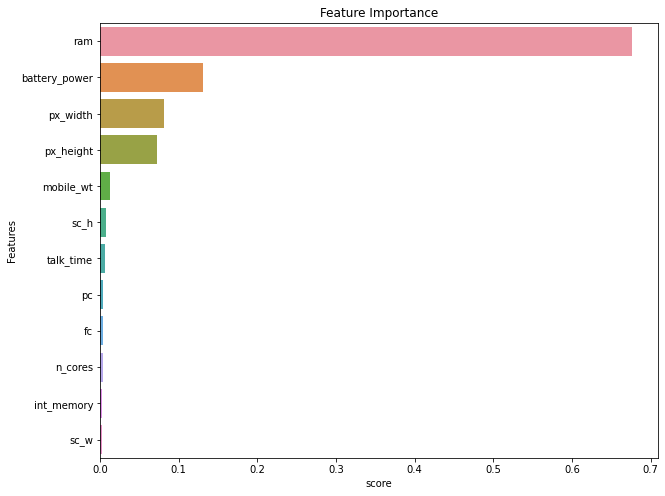

In [81]:
#plotting feature importances
plot_feature_importance(dtc_optimal)

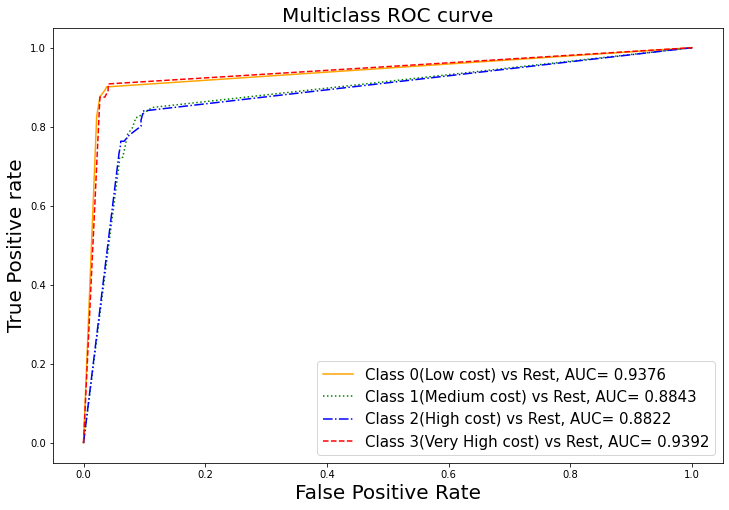

In [82]:
# Plot AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

### **Decision Tree Classifier-Observations:**
#### *   **Train accuarcy has been reduced to 98% from 100% and test accuarcy is increased by 1% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.**
#### *   **RAM,battery power,px_height and width came out to be the most important featrures**
#### *   **This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.96 for both classes,whereas for class 1 and class 2 it is 0.88.**

### **2) Random Forest classifier:**

In [83]:
# splitting the data into trainset and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [84]:
# creating an object of the classifier.
rfc=RandomForestClassifier(random_state=0)

In [85]:
# fitting/training the model.
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [86]:
# predicting the y values of train set and test set.
y_train_pred=rfc.predict(X_train)
y_pred=rfc.predict(X_test)

In [87]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [88]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.8778004073319755

In [89]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[110,  11,   0,   0],
       [  7, 102,  10,   0],
       [  0,  14, 107,  10],
       [  0,   0,   8, 112]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


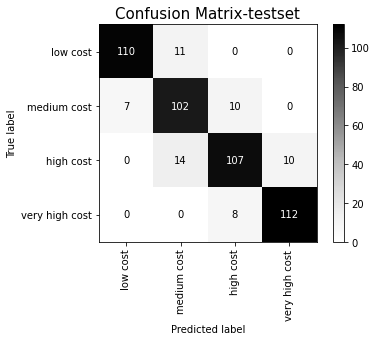

In [90]:
# plotting confusion matrix for test set.
plot_confusion_matrix(rfc,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [91]:
# printing the classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00       373
           2       1.00      1.00      1.00       360
           3       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [92]:
# printing the classification report for train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       121
           1       0.80      0.86      0.83       119
           2       0.86      0.82      0.84       131
           3       0.92      0.93      0.93       120

    accuracy                           0.88       491
   macro avg       0.88      0.88      0.88       491
weighted avg       0.88      0.88      0.88       491





*   **Train accuarcy is 100% and test accuracy is 88%. which is quite good. But model seems to be overfitted and has not generalised the data well. We need to reduce overfitting and improve the model performance.**
*   **we do some hyperparameter tunning to reduce overfitting**




## **3)Gradient Boosting Classifier:**

### **With default hyperparameters:**

In [93]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [94]:
# creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [95]:
# fittng/training the data.
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [96]:
# predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [97]:
# checking the accuracy score of train data.
accuracy_score(y_train,y_train_pred)

0.9993211133740665

In [98]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.8961303462321792

In [99]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[111,  10,   0,   0],
       [  6, 103,  10,   0],
       [  0,  13, 112,   6],
       [  0,   0,   6, 114]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


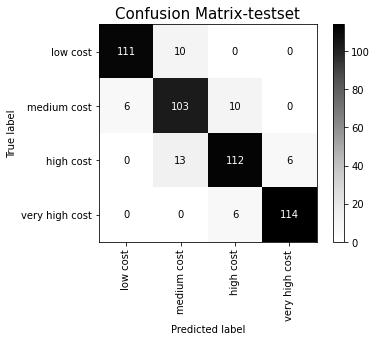

In [100]:
# plotting confusion matrix for test set.
plot_confusion_matrix(gbc,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [101]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00       373
           2       1.00      1.00      1.00       360
           3       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [102]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       121
           1       0.82      0.87      0.84       119
           2       0.88      0.85      0.86       131
           3       0.95      0.95      0.95       120

    accuracy                           0.90       491
   macro avg       0.90      0.90      0.90       491
weighted avg       0.90      0.90      0.90       491




**Train accuarcy is 100% and test accuracy is 89%. which is quite good. But if we want more accuracy than we can do some hypermeter tunning on that and improve the model performance.**





### **4) K Nearest Neighbors**

### **With default hyperparametrs:**

In [103]:
knn=KNeighborsClassifier()     # creating an object of the classifier
knn.fit(X_train_scaled,y_train)   #  fitting the data

KNeighborsClassifier()

In [104]:
# predicting the y values of train and test set.
y_train_pred=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

In [105]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

0.7630685675492193

In [106]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.5885947046843177

In [107]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[96, 24,  1,  0],
       [37, 60, 22,  0],
       [ 3, 55, 60, 13],
       [ 0,  7, 40, 73]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


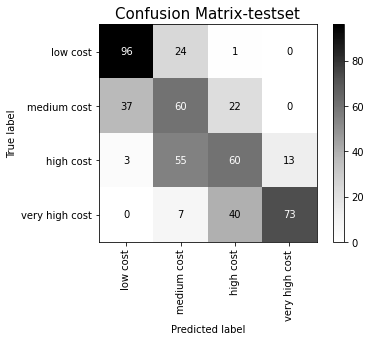

In [108]:
# plotting confusion matrix for test set.
plot_confusion_matrix(knn,X_test_scaled,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [109]:
# printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       373
           1       0.65      0.69      0.67       373
           2       0.69      0.69      0.69       360
           3       0.94      0.79      0.86       367

    accuracy                           0.76      1473
   macro avg       0.77      0.76      0.76      1473
weighted avg       0.77      0.76      0.76      1473



In [110]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       121
           1       0.41      0.50      0.45       119
           2       0.49      0.46      0.47       131
           3       0.85      0.61      0.71       120

    accuracy                           0.59       491
   macro avg       0.61      0.59      0.60       491
weighted avg       0.61      0.59      0.59       491



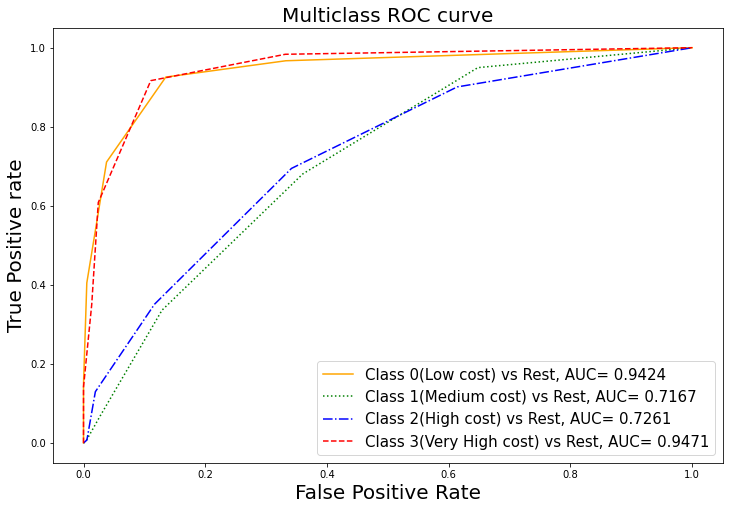

In [111]:
# Plot AUC ROC curve.
pred_prob = knn.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

**Observations:**
**Before hyperparameters tuning:**

**Train Accuracy:75 %**
**Test Accuarcy:59 %**
**Clearly Model has performed very worst. We did hyperparameter tuning** 

### **5) XGBoost Classifier:**

In [112]:
# spltting the data into train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [113]:
xgb=XGBClassifier()        # creating an object of the classifier
xgb.fit(X_train,y_train)      # fitting the data 

XGBClassifier(objective='multi:softprob')

In [114]:
# predicting y values of train and test data.
y_train_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)

In [115]:
# checking the accuracy score of train set 
accuracy_score(y_train,y_train_pred)

0.9898167006109979

In [116]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.9083503054989817

In [117]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[113,   8,   0,   0],
       [  5, 106,   8,   0],
       [  0,  13, 112,   6],
       [  0,   0,   5, 115]])

In [118]:
# printing the classification report of train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       373
           1       0.97      0.99      0.98       373
           2       0.99      0.97      0.98       360
           3       1.00      1.00      1.00       367

    accuracy                           0.99      1473
   macro avg       0.99      0.99      0.99      1473
weighted avg       0.99      0.99      0.99      1473



In [119]:
# printing the classification report of the test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       121
           1       0.83      0.89      0.86       119
           2       0.90      0.85      0.88       131
           3       0.95      0.96      0.95       120

    accuracy                           0.91       491
   macro avg       0.91      0.91      0.91       491
weighted avg       0.91      0.91      0.91       491



**Clearly Model has performed good Accuracy.**

**Train accuracy = 98% Test Accuarcy= 90 %**

### **Support Vector Machine(SVM):**

In [120]:
# Import all relevant libraries

from sklearn.svm import SVC

In [121]:
svc = SVC(random_state=101)      # creating an object of classifier
svc.fit(X_train_scaled,y_train)    # fitting the model/training the model.

SVC(random_state=101)

In [122]:
# predicting the y value of train set and test set
y_train_pred=svc.predict(X_train_scaled)
y_pred=svc.predict(X_test_scaled)

In [123]:
# Accuracy score for train set
accuracy_score(y_train,y_train_pred)

0.9762389680923286

In [124]:
# Accuracy score for test set.
accuracy_score(y_test,y_pred)

0.9083503054989817

In [125]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[111,  10,   0,   0],
       [  4, 107,   8,   0],
       [  0,  13, 113,   5],
       [  0,   0,   5, 115]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


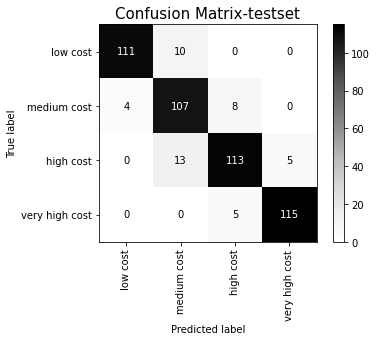

In [126]:
# plotting confusion matrix for test set.
plot_confusion_matrix(svc,X_test_scaled,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [127]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       373
           1       0.96      0.98      0.97       373
           2       0.96      0.96      0.96       360
           3       0.99      0.98      0.99       367

    accuracy                           0.98      1473
   macro avg       0.98      0.98      0.98      1473
weighted avg       0.98      0.98      0.98      1473



In [128]:
#printing the classifiaction report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       121
           1       0.82      0.90      0.86       119
           2       0.90      0.86      0.88       131
           3       0.96      0.96      0.96       120

    accuracy                           0.91       491
   macro avg       0.91      0.91      0.91       491
weighted avg       0.91      0.91      0.91       491



**Accuracy score on train set is 98.5% and Test score is 89%.**
**Model seems to be overfitted as the differance between train and test accuracy score is almot 10%.**